# <span style="color:blue"> Esercizio 5
# 5.01

L'esercizio consiste nel campionare il modulo quadro della funzione d'onda di un atomo di idrogeno attraverso l'algoritmo di Metropolis e calcolare il valor medio del raggio. 
Le funzioni d'onda in esame sono quella dello stato fondamentale, ovvero $\Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} $ e quella dello stato eccitato $2p$, $\Psi_{2,1,0}(r,\theta,\phi)=\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)$.
    
In breve, l'algoritmo di Metropolis permette di campionare una distribuzione di probabilità, in questo caso $|\Psi(x,y,z)|^2$, attraverso una successione di passi determinati dalla matrice di trasferimento stocastico $K(\vec{x}|\vec{y})=T(\vec{x}|\vec{y})\times A(\vec{x}|\vec{y})$. A partire un punto iniziale $y$, viene proposto attraverso $T(\vec{x}|\vec{y})$, matrice della probabilità di transizione, un nuovo punto $x$; viene calcolata la probabilità di accettazione attraverso $$A(\vec{x}|\vec{y})=\min[1, \frac{T(\vec{y}|\vec{x})p(x)}{T(\vec{x}|\vec{y})p(y)}]$$ che si riduce a $\min[1, \frac{p(x)}{p(y)}]=\alpha$ nel caso $T(\vec{x}|\vec{y})$=$T(\vec{y}|\vec{x})$.
    
Infine, viene estratto uniformemente r fra $[0,1]$ e il nuovo punto campionato risulta essere $x$, se $r\leq \alpha$, oppure ancora $y$ se $r>\alpha$. 
    
Attraverso l'algoritmo di Metropolis è possibile campionare una distribuzione di probabilità p(x) indipendentemente dalla distribuzione di probabilità del tentativo $T(\vec{x}|\vec{y})$, purchè soddisfi regolarità ed ergodicità.
Perciò in seguito sono mostrati i grafici di $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ con relative incertezze, campionati attraverso due $T(\vec{x}|\vec{y})$ differenti. 



### A. Uniforme 

Nella prima simulazione è stata utilizzata una $T(\vec{x}|\vec{y})$ uniforme in una sfera di raggio R. La scelta del raggio è stata dettata dalla necesessità di ottenere un valore d'accettanza intorno al 50% (condizione che verrà motivata nell'ultimo paragrafo). 

Dopo una fase di equilibratura iniziale di 1000 passi, dove il sistema viene fatto evolvere secondo l'algoritmo di Metropolis senza utilizzare i valori campionati di $|\Psi(x,y,z)|^2$ per il calcolo di $\left\langle r \right\rangle$, sono stati campionati $M=10^6$ valori ed è stato stimato $\left\langle r \right\rangle$ come $\int r |\Psi(r,\theta )|^2$. L'incertezza è stata calcolata attraverso il metodo a blocchi, con $N=100$ numero di blocchi e $L=10^4$ misure per blocco. Il calcolo delle incertezze statistiche richiede il metodo a blocchi perchè, producendo punti correlati, non possiamo utilizzare teorema del limite centrale.

Infine sono stati graficati sia $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$, $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$ con le loro incertezze e i valori attesi, che i punti $(x, y, z)$ degli orbitali campionati, attraverso una rappresentazione 3D.

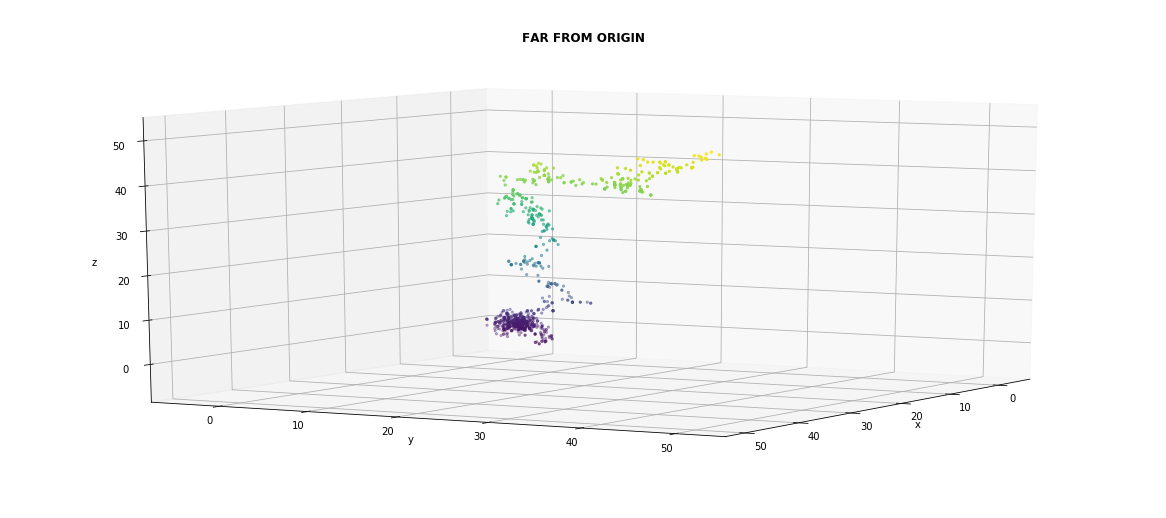

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X,Y,Z=np.loadtxt("ex_5.01/far_from_origin.out", usecols=(0, 1, 2), unpack=True)

fig = plt.figure(figsize=(16,7))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title("FAR FROM ORIGIN", fontweight="bold")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)


###### Commento: 
Nell'immagine è rappresentato il comportamento della porzione iniziale di codice per equilibrare la simulazione, nel caso di una partenza molto distante dall'origine (50, 50, 50), con $|\Psi_{1,0,0}(x,y,z)|^2$ come densità di probabilità e $T$ uniforme. Come si può notare, l'algoritmo riporta i valori di (x, y, z) nella zona dove la densità di probabilità è maggiore, ovvero nell'intorno di raggio pari a qualche $a_0$ centrato nell'origine.
Come punto iniziale per la fase di equilibrazione delle simulazioni successive è stato scelto un punto appartenente a questo intorno, ovvero $(\frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}})$. La scelta dell'origine come punto di partenza risulta indifferente nel caso seguita dalla fase di equilibrazione, ma nel caso di $\Psi_{2,1,0}(x,y,z)$, l'origine risulta essere un punto a probabilità nulla, perciò non è adatto come punto di iniziale della simulazione.

 == PSI 100 ==
Acceptance :  0.504159
Radius :  1.55
<r>:  1.50266 +- 0.00451556
 == PSI 210 ==
Acceptance :  0.5037
Radius :  3.8
<r>:  5.00523 +- 0.0104943


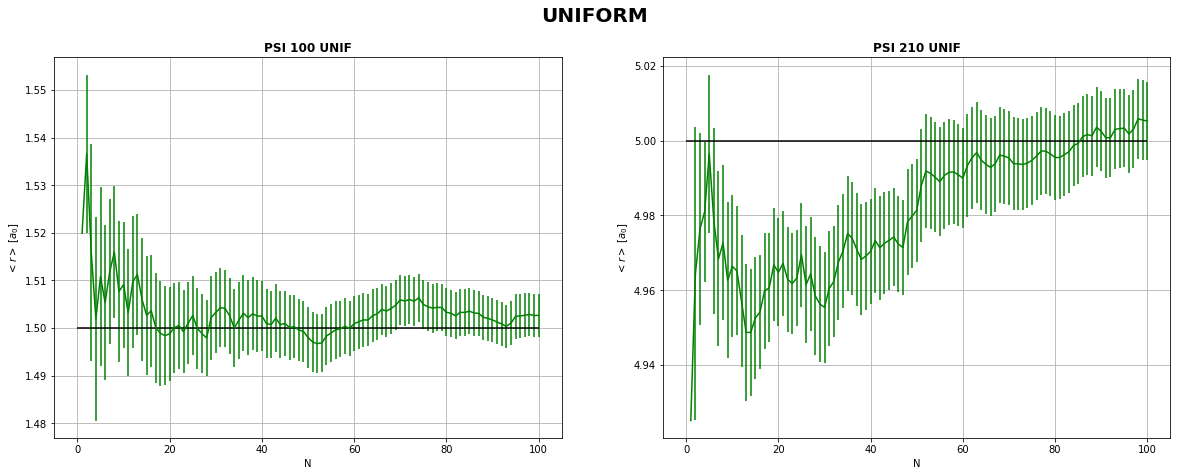

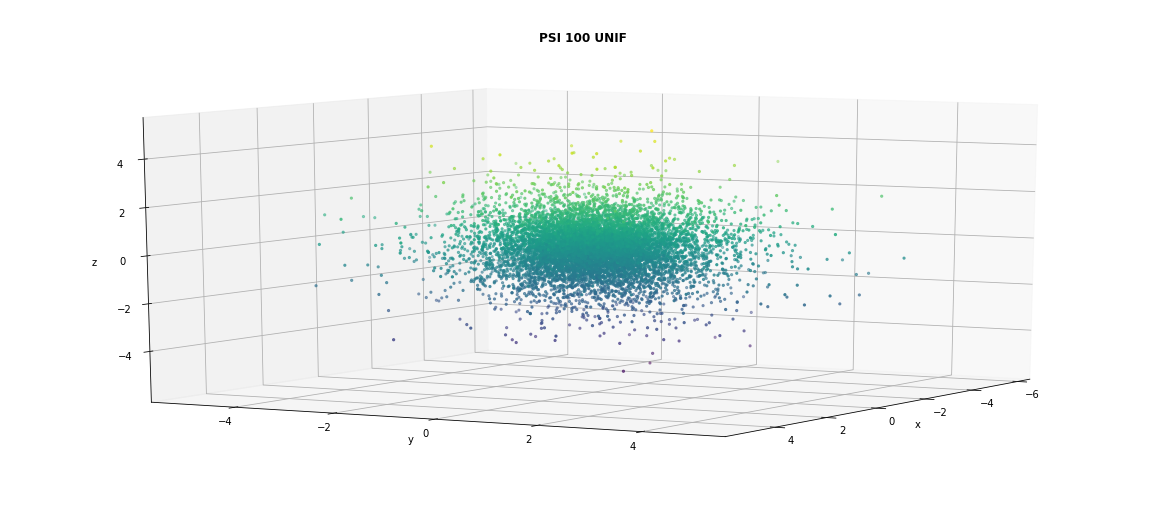

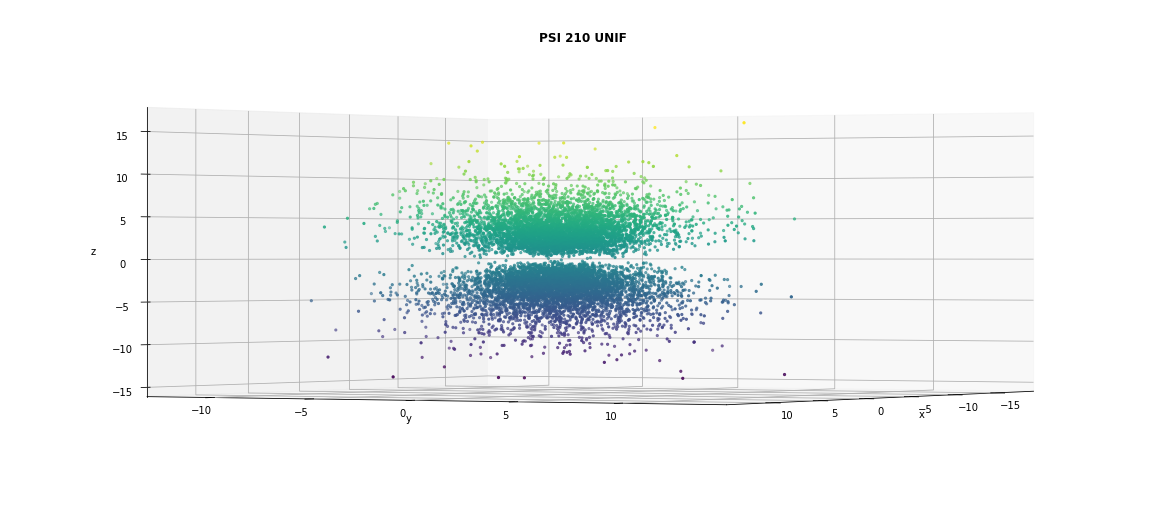

In [42]:
##### #disegnare le funzioni prima di scegliere il punto di partenza 
from IPython.display import display, Markdown, Latex

fig=plt.figure(figsize=(20,7))
fig.suptitle('UNIFORM', fontsize=20, fontweight="bold")

init=np.loadtxt("ex_5.01/psi100_acceptance.out", usecols=(0), unpack=True)
plt.subplot(121)
x,y,err=np.loadtxt("ex_5.01/psi100.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x,y,yerr=err, color= "g")
plt.xlabel('N')
plt.ylabel('$<r>$ [$a_0$]')
plt.title("PSI 100 UNIF", fontweight="bold")
plt.hlines(1.5, 0, 100)
plt.grid(True)
print(" == PSI 100 ==")
print("Acceptance : ", init[0])
print("Radius : ", init[1])
print("<r>: ", y[99], "+-",  err[99])

init=np.loadtxt("ex_5.01/psi210_acceptance.out", usecols=(0), unpack=True)
plt.subplot(122)
x,y,err=np.loadtxt("ex_5.01/psi210.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x,y,yerr=err, color= "g")
plt.xlabel('N')
plt.ylabel('$<r>$ [$a_0$]')
plt.title("PSI 210 UNIF", fontweight="bold")
plt.hlines(5.0, 0, 100)
plt.grid(True)
print(" == PSI 210 ==")
print("Acceptance : ", init[0])
print("Radius : ", init[1])
print("<r>: ", y[99], "+-",  err[99])


X,Y,Z=np.loadtxt("ex_5.01/xyzpsi100.out", usecols=(0, 1, 2), unpack=True)

fig = plt.figure(figsize=(16,7))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title("PSI 100 UNIF", fontweight="bold")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

fig = plt.figure(figsize=(16,7))
X,Y,Z=np.loadtxt("ex_5.01/xyzpsi210.out", usecols=(0, 1, 2), unpack=True)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title("PSI 210 UNIF", fontweight="bold")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 30)
plt.show()


###### Commento: 
I grafici risultano compatibili con il valore atteso di $\left\langle r \right\rangle$ e la rappresentazione degli orbitali è in accordo con le rappresentazioni analitiche. Il valore di $R$ per soddisfare la condizione empirica sull'accettanza nella seconda simulazione risulta essere più del doppio del primo, il che è atteso siccome la distribuzione di probabilità del secondo è maggiormente spalmata verso valori di $r$ maggiori, a causa della forza centrifuga.  

### B. Gaussiana Multivariata

Per confermare il fatto che l'algoritmo di Metropolis non dipende dalla probabilità di transizione $T(\vec{x}|\vec{y})$, purchè soddisfi le ipotesi di ergodicità e regolarità, sono mostrati i valori di $\left\langle r \right\rangle$ ottenuti con una $T(\vec{x}|\vec{y})$ corrispondente ad una gaussiana multivariata, centrata in $y$ e di larghezza $R$. 
I valori della simulazione e le grandezze graficate sono identiche a quelle presentate in precedenza. 
I valori ottenuti sono compatibili con quelli precedenti.


 == PSI 100 GAUSS ==
Acceptance :  0.503552
Radius :  0.75
<r>:  1.49808 +- 0.00471019
 == PSI 210 GAUSS ==
Acceptance :  0.495365
Radius :  1.9
<r>:  4.9957 +- 0.010642


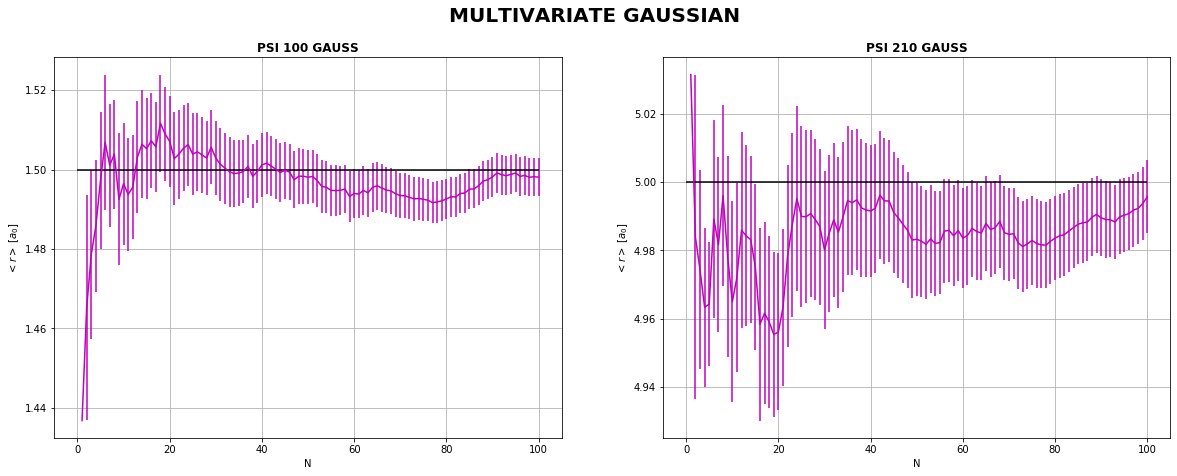

In [41]:

fig=plt.figure(figsize=(20,7))
fig.suptitle('MULTIVARIATE GAUSSIAN', fontsize=20, fontweight="bold")

init=np.loadtxt("ex_5.01/psi100_gauss_acceptance.out", usecols=(0), unpack=True)
plt.subplot(121)
x,y,err=np.loadtxt("ex_5.01/psi100_gauss.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x,y,yerr=err, color= "m")
plt.xlabel('N')
plt.ylabel('$<r>$ [$a_0$]')
plt.title("PSI 100 GAUSS", fontweight="bold")
plt.hlines(1.5, 0, 100)
plt.grid(True)
print(" == PSI 100 GAUSS ==")
print("Acceptance : ", init[0])
print("Radius : ", init[1])
print("<r>: ", y[99], "+-",  err[99])

init=np.loadtxt("ex_5.01/psi210_gauss_acceptance.out", usecols=(0), unpack=True)
plt.subplot(122)
x,y,err=np.loadtxt("ex_5.01/psi210_gauss.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x,y,yerr=err, color= "m")
plt.xlabel('N')
plt.ylabel('$<r>$ [$a_0$]')
plt.title("PSI 210 GAUSS", fontweight="bold")
plt.hlines(5.0, 0, 100)
plt.grid(True)
print(" == PSI 210 GAUSS ==")
print("Acceptance : ", init[0])
print("Radius : ", init[1])
print("<r>: ", y[99], "+-",  err[99])
plt.show()



### C. Bassa e alta accettanza 
Le seguenti simulazioni sono state effettuate con valori di accettanza estremi, per mostrare il comportamento dell'algoritmo in queste situazioni (tutti i valori identici alla prima simulazione con $T(\vec{x}|\vec{y})$ uniforme e $|\Psi_{1,0,0}(x,y,z)|^2$ come densità da campionare). 
La scelta di un valore grande del raggio implica una bassa accettanza che comporta una bassa efficienza dell'algoritmo e presenta il rischio di campionare molte volte consecutive lo stesso valore, ottenendo pseudo-singolarità nella densità di probabilità. D'altra parte però, ogni qual volta venga accettato un nuovo valore questo risulta essere particolarmente scorrelato da quelli precedenti.

Invece, per quanto riguarda valori troppo piccoli del raggio, e quindi alta accettanza, si ottengono valori molto correlati che causano un aumento nei valori dell'incertezza. Per compensare ciò, sarebbe possibile ingrandire ulteriormente la dimensione dei blocchi $L$.

Infatti, i valori nel caso di bassa accettanza risultano compatibili entro $2\sigma$ mentre nel caso di alta accettanza hanno un errore quasi due volte maggiore della controparte con accettanza intermedia. 

 == PSI 100 - ACCEPTANCE :0.093714==
Radius :  5.0
<r>:  1.48337 +- 0.00726773
 == PSI 100 - ACCEPTANCE :0.925184==
Radius :  0.2
<r>:  1.48271 +- 0.0171496


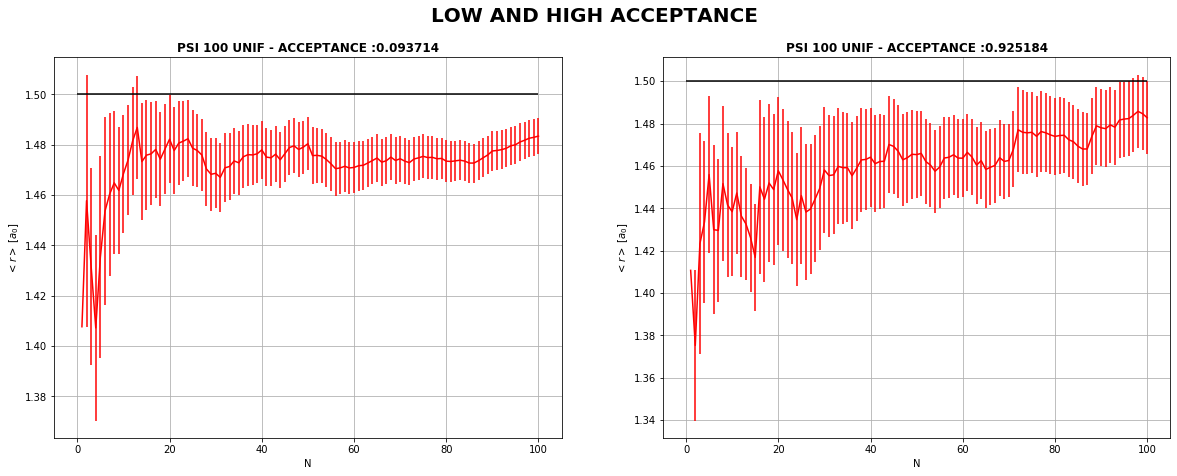

In [43]:
fig=plt.figure(figsize=(20,7))
fig.suptitle('LOW AND HIGH ACCEPTANCE', fontsize=20, fontweight="bold")

init=np.loadtxt("ex_5.01/psi100_low_acceptance.out", usecols=(0), unpack=True)
plt.subplot(121)
x,y,err=np.loadtxt("ex_5.01/psi100_low.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x,y,yerr=err, color= "r")
plt.xlabel('N')
plt.ylabel('$<r>$ [$a_0$]')
plt.title("PSI 100 UNIF - ACCEPTANCE :" + str(init[0]), fontweight="bold")
plt.hlines(1.5, 0, 100)
plt.grid(True)
print(" == PSI 100 - ACCEPTANCE :" + str(init[0]) + "==")
print("Radius : ", init[1])
print("<r>: ", y[99], "+-",  err[99])

    
init=np.loadtxt("ex_5.01/psi100_high_acceptance.out", usecols=(0), unpack=True)
plt.subplot(122)
x,y,err=np.loadtxt("ex_5.01/psi100_high.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x,y,yerr=err, color= "r")
plt.xlabel('N')
plt.ylabel('$<r>$ [$a_0$]')
plt.title("PSI 100 UNIF - ACCEPTANCE :" + str(init[0]), fontweight="bold")
plt.hlines(1.5, 0, 100)
plt.grid(True)
print(" == PSI 100 - ACCEPTANCE :" + str(init[0]) + "==")
print("Radius : ", init[1])
print("<r>: ", y[99], "+-",  err[99])
